<a href="https://colab.research.google.com/github/honlai/Financial_Mathematics_I/blob/main/Exercises3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Execute simulations for (fractional) Kelly betting/trading



In [364]:
import random as rd
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
W=0.7
L=1-W
NBets=100
stack=50
payout_odds=1.6

In [365]:
def give_ratio():
  rdn=np.random.binomial(1,W,size=NBets-1)
  #Win: to_bet_from_stack*payout_odds Loss: to_bet_from_stack=0
  ratio=np.where(rdn>0,payout_odds,0)
  #print(ratio)
  return ratio

###What Is the Kelly Criterion?
The Kelly Criterion is a formula used to determine the optimal size of a bet when the expected returns are known. According to the formula, the optimal bet is determined by the formula
####The Kelly percentage:
$$K\%=W-\frac{1-W}{po}$$
where
$W=$ Winning probability , $po=$ payout odds

In [366]:
def get_Kp(Wr=W,po=payout_odds):
  Kp=Wr-((1-Wr)/po)
  return Kp

In [367]:
def get_stacks(p_to_bet=0,ratio=np.ones(NBets)):
  st=np.zeros(NBets)
  st[0]=stack
  for bets in range(NBets-1):
    st[bets+1]=np.round(st[bets]*(1-p_to_bet))+np.round(np.round(st[bets]*p_to_bet)*ratio[bets])
    #print(st[bets+1])
  return st

In [368]:
def graph():
  r=give_ratio()
  st_Kp=get_stacks(get_Kp(),r)
  st_20=get_stacks(0.2,r)
  st_40=get_stacks(0.4,r)
  st_60=get_stacks(0.6,r)
  st_80=get_stacks(0.8,r)
  data = {'Kp': st_Kp,'20': st_20,'40': st_40,'60': st_60,'80': st_80}
  df = pd.DataFrame(data)
  df.plot()
  plt.xlabel('Bets')
  plt.ylabel('Stack')
  return

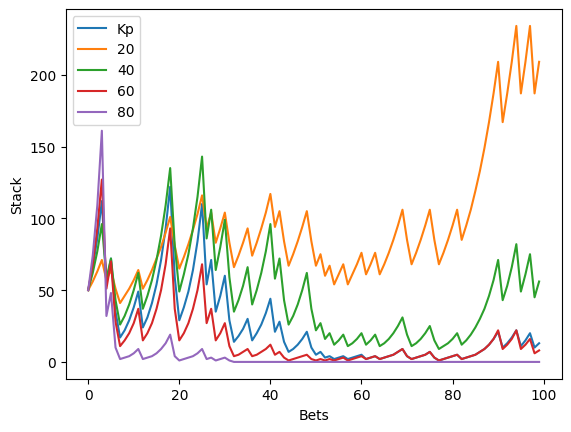

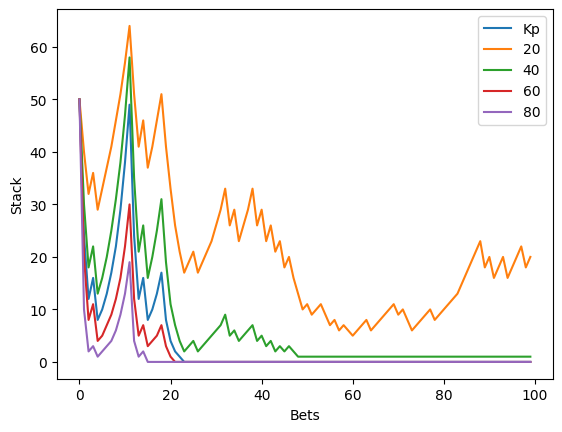

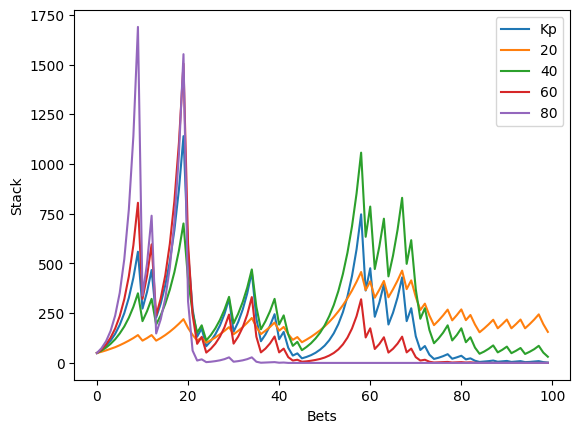

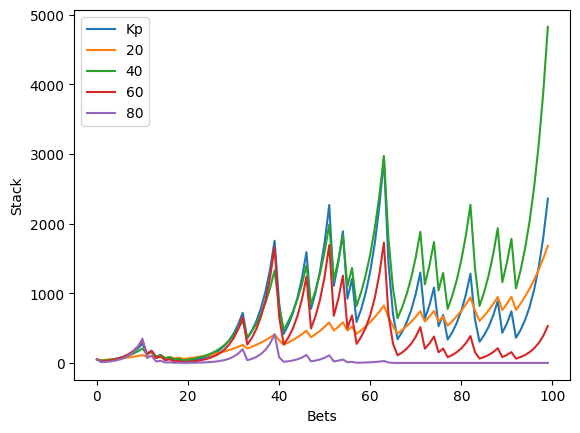

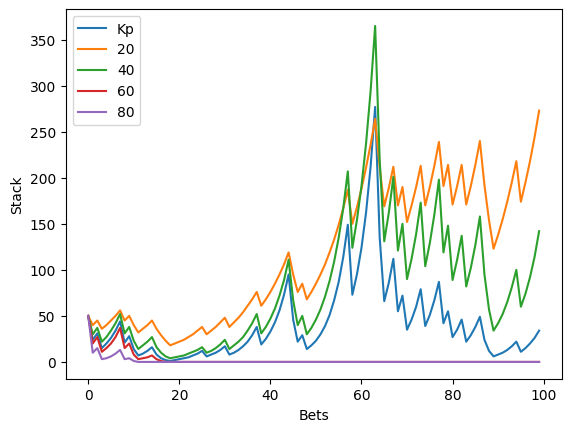

In [369]:
for i in range(5):
  graph()

       0     1      2     3      4      5     6      7      8     9  ...  \
0   50.0  50.0   50.0  50.0   50.0   50.0  50.0   50.0   50.0  50.0  ...   
1   66.0  24.0   66.0  66.0   66.0   66.0  66.0   66.0   66.0  24.0  ...   
2   86.0  31.0   86.0  32.0   86.0   86.0  32.0   86.0   86.0  31.0  ...   
3   42.0  41.0  112.0  42.0  112.0   42.0  42.0  112.0  112.0  41.0  ...   
4   20.0  20.0  146.0  20.0  146.0   20.0  20.0  146.0  146.0  54.0  ...   
..   ...   ...    ...   ...    ...    ...   ...    ...    ...   ...  ...   
95   0.0   0.0    0.0   9.0    0.0  227.0   0.0   34.0   36.0   0.0  ...   
96   0.0   0.0    0.0   4.0    0.0  297.0   0.0   44.0   47.0   0.0  ...   
97   0.0   0.0    0.0   5.0    0.0  388.0   0.0   21.0   61.0   0.0  ...   
98   0.0   0.0    0.0   2.0    0.0  507.0   0.0   10.0   80.0   0.0  ...   
99   0.0   0.0    0.0   1.0    0.0  663.0   0.0   13.0   39.0   0.0  ...   

       40    41    42    43     44     45    46    47     48        49  
0    50.0  50.

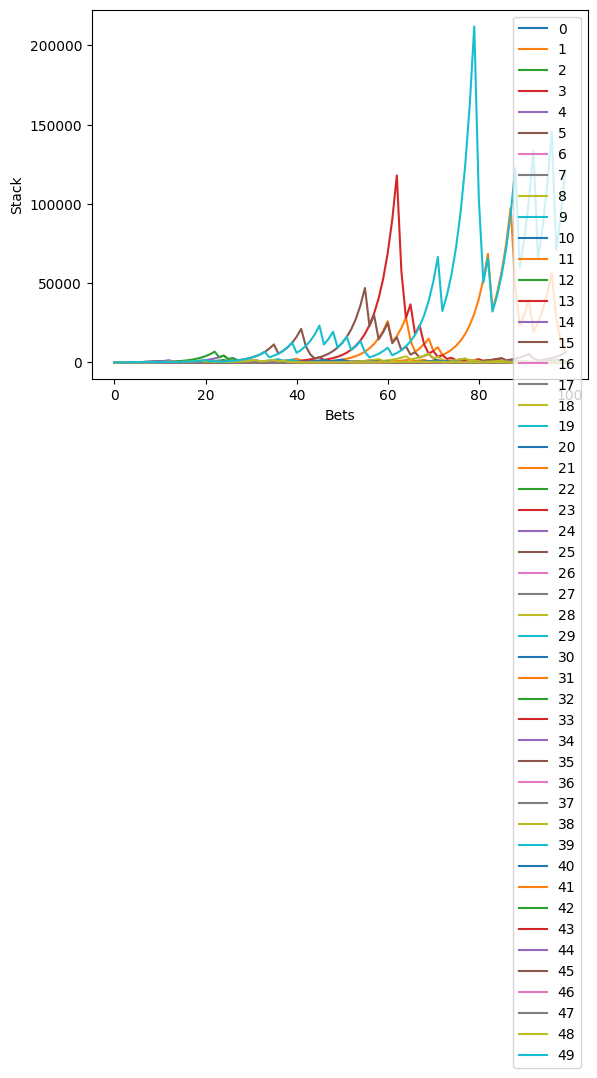

In [373]:
def graph_Kp(Nmax=50):
  data = {}
  for i in range(Nmax):
    r=give_ratio()
    st_Kp=get_stacks(get_Kp(),r)
    data.update({str(i): st_Kp})
  df = pd.DataFrame(data)
  df.plot()
  plt.xlabel('Bets')
  plt.ylabel('Stack')
  print(df)
  return
graph_Kp()